In [1]:
# import from skimage
from skimage.color import rgb2gray
from skimage.filters import sobel, sobel_h, sobel_v, prewitt, roberts, gaussian
from skimage.feature import canny
import skimage.io as io
import cv2 as cv

from scipy.spatial import distance as dist

# import from matplotlib
import matplotlib.pyplot as plt

# import from numpy
import numpy as np

# import utils
from utils.commonfunctions import *

In [40]:
# img = io.imread("datasets/dataset_module1/01.jpg")

# read image 1.jpg
img = cv.imread('dataset/inputs/Five0.png',0)
# colored_img = cv.imread('datasets/dataset_module1/01.jpg')
# img = cv.imread('datasets/dataset_module1/11.jpg',0)

# convert to greyscale
grey_scale = img
# blurredImg = img
# blurredImg =  cv.medianBlur(img,7)
blurredImg = cv.GaussianBlur(img,(5,5),0)
# blurredImg = gaussian(img,sigma = 2)

print(img.shape)

(843, 610)


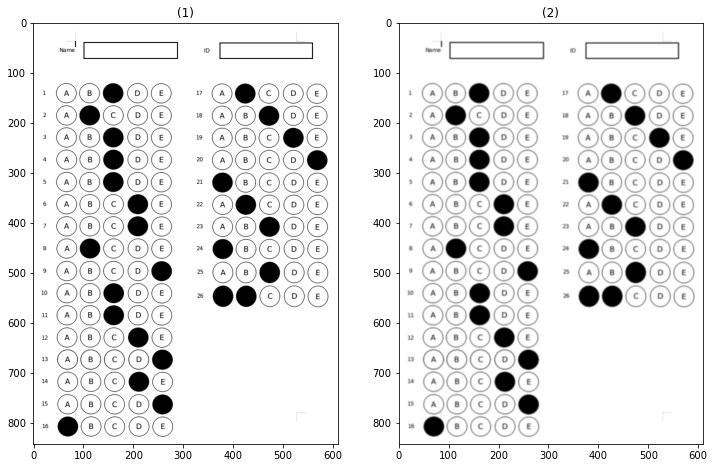

In [41]:
show_images([img,blurredImg])

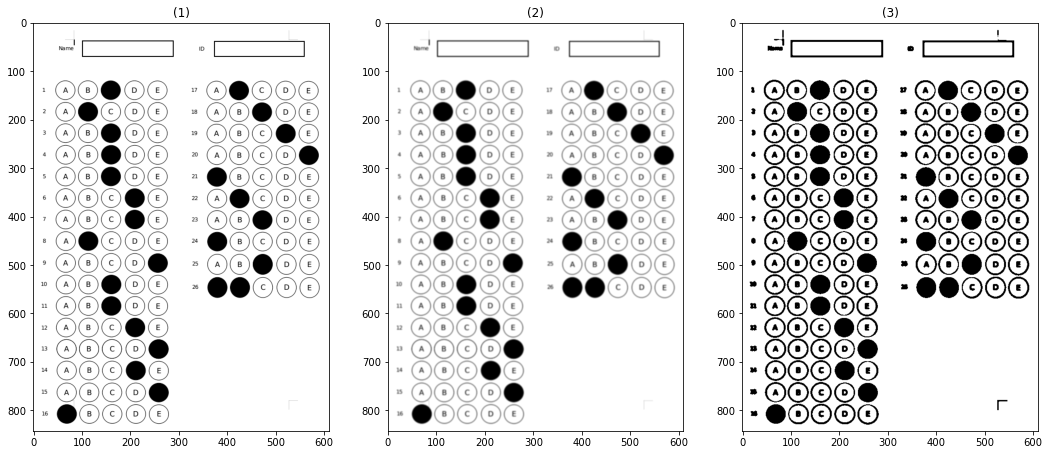

In [42]:
binaryImg = cv.adaptiveThreshold(blurredImg,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,59,3)
# ret,binaryImg = cv.threshold(blurredImg,147,255,cv.THRESH_BINARY)
show_images([img,blurredImg,binaryImg])

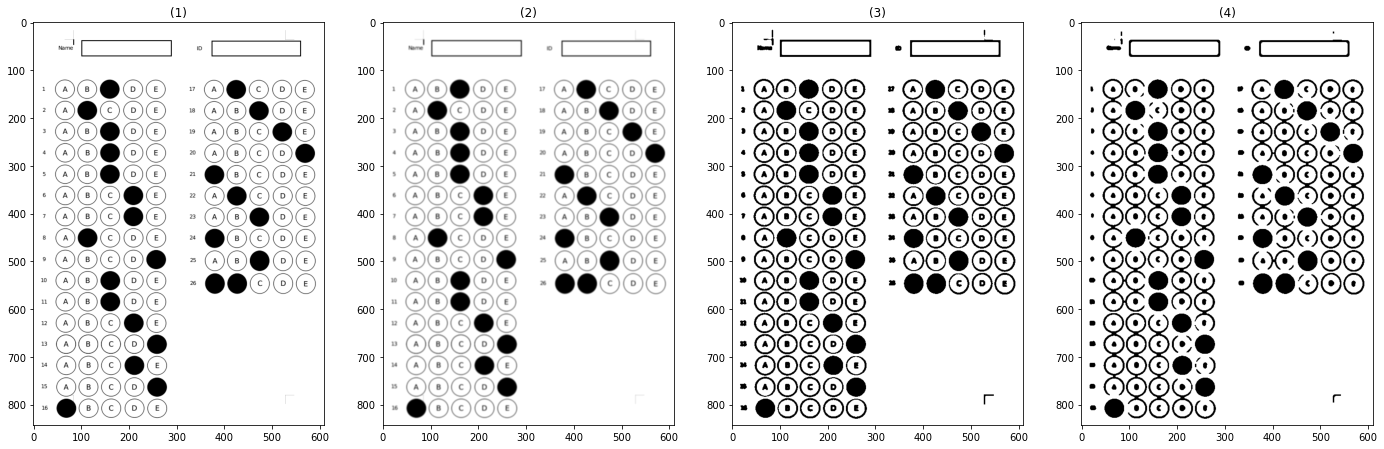

In [43]:
median =  cv.medianBlur(binaryImg,5)
median =  cv.medianBlur(median,5)
show_images([img,blurredImg,binaryImg,median])

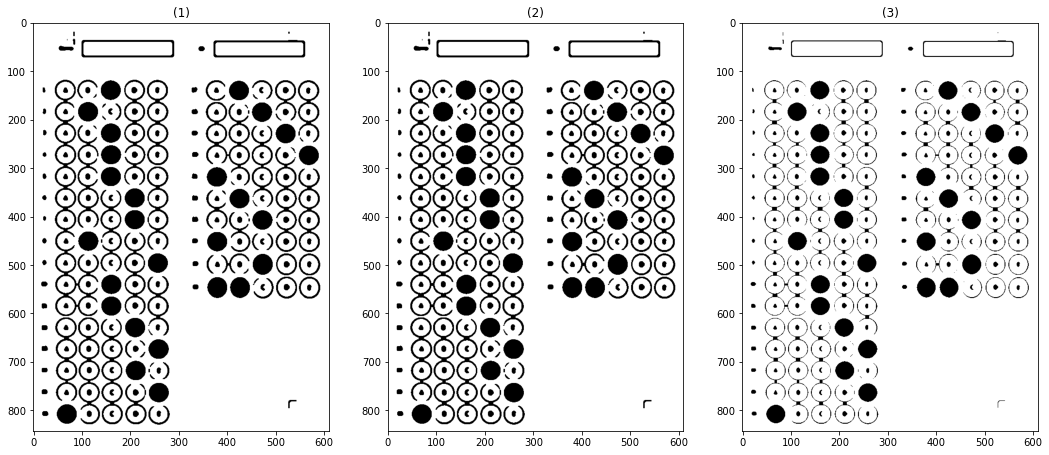

In [44]:
kernel = np.ones((3,3))
openingImg = opening(median, kernel)
dilatedImg = dilate(openingImg, kernel)
show_images([median,openingImg,dilatedImg])

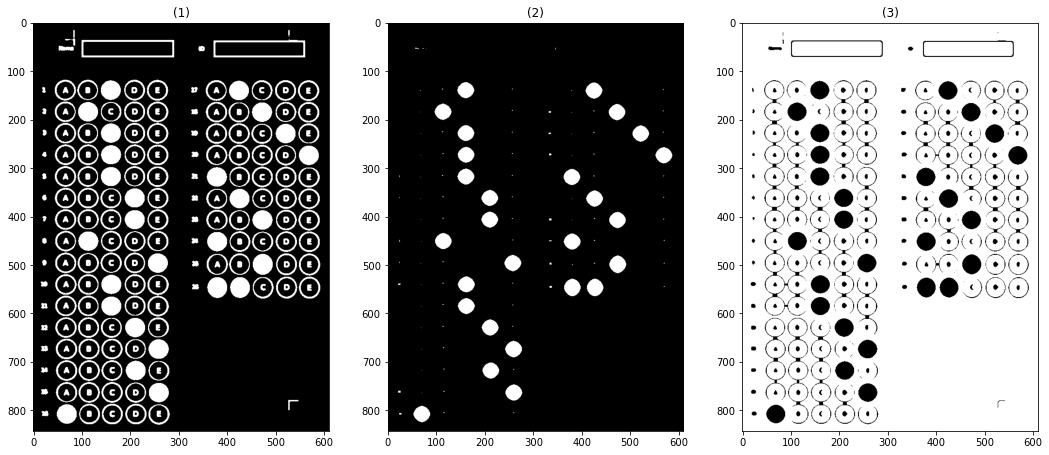

In [52]:
negativeImg = 255-binaryImg
kernel = np.ones((7,7))
erodedImg = erode(negativeImg, kernel)
show_images([negativeImg,erodedImg,dilatedImg])

25


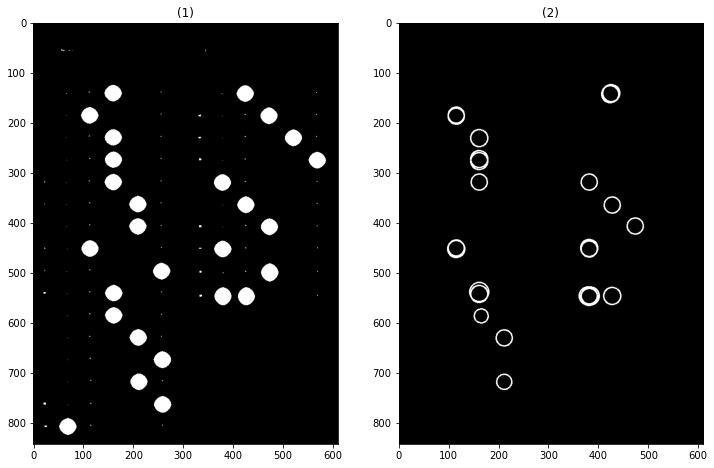

In [65]:
circles = cv.HoughCircles(erodedImg,cv.HOUGH_GRADIENT,1,2,
                            param1=80,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
print(len(circles[0]))
cimg = np.zeros(dilatedImg.shape)
for i in circles[0,:]:
    # draw the outer circle
#     if(i[2] < 50):
    cv.circle(cimg,(i[0],i[1]),i[2],(255,255,255),2)
    # draw the center of the circle
#     cv.circle(cimg,(i[0],i[1]),2,(255,255,255),2)
show_images([erodedImg,cimg])